# Assignment #2 - Classification

<font color="red"> <b> Due: Mar 5 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Mayuri Kingre </font>

# I. Introduction

The main objective of this assignment is to practice the implementation of classification algorithms, such as perceptron (Pocket Algorithm), QDA, LDA and Logistic Regression. The LDA and QDA involve computations of discrimanants. Pocket algorithm and Logistic Regression use learning values to drive the growth rate or learning rate of the algorithms. 

# II. Data

This dataset is obtained from Kaggle. It is titled as 'Rain in Australia'. We are provided with multiple features such as city, temperature levels, rainfall measure, evaporation, sunshine, wind directions and speeds, etc from 2008 to 2017. In this dataset, there are around 142194 rows (data samples) and 2 columns (features). The objective or target feature in this dataset is prediction of tomorrow's rain. Hence, this is an ideal dataset for practicing binary classification, where the answer is either 1 (it will rain) or -1 (it will not rain). <br>
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

| Column | Data Type |
| ----| ----|
| Date   | Date |
| Location   | String |
| MinTemp   | Numeric |
| MaxTemp   | Numeric |
| Rainfall   | Numeric |
| Evaporation   | Numeric |
| Sunshine   | Numeric |
| WindGustDir   | String |
| WindGustSpeed   | Numeric |
| WindDir9am   | String |
| WindDir3pm   | String |
| WindSpeed9am   | Numeric |
| WindSpeed3pm   | Numeric |
| Humidity9am   | Numeric |
| Humidity3pm   | Numeric |
| Pressure9am   | Numeric |
| Pressure3pm   | Numeric |
| Cloud9am | Numeric |
| Cloud3pm | Numeric |
| Temp9am | Numeric |
| Temp3pm | Numeric |
| RainToday | String |
| RISK_MM | Numeric |
| RainTomorrow | String |

In [204]:
import pandas as pd
import numpy as np
from copy import deepcopy as copy 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

In [205]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [206]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [207]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

We're dropping a few columns since they aren't contributing much to providing relevant information with respect to our model. The first four columns have very less data, date and location aren't needed, since we want to predict weather for Australia as a whole. <br> As per the instructions in Kaggle dataset, removing Risk_MM feature, because it would otherwise leak the answers to our model.

In [208]:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date','WindGustDir','WindDir3pm','WindDir9am'],axis=1)
df.shape

(142193, 14)

Dropping columns with null values, since we have enough features (more than 10) to compensate for missing data.

In [209]:
df = df.dropna(how='any')
df.shape

(119590, 14)

In [210]:
df.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

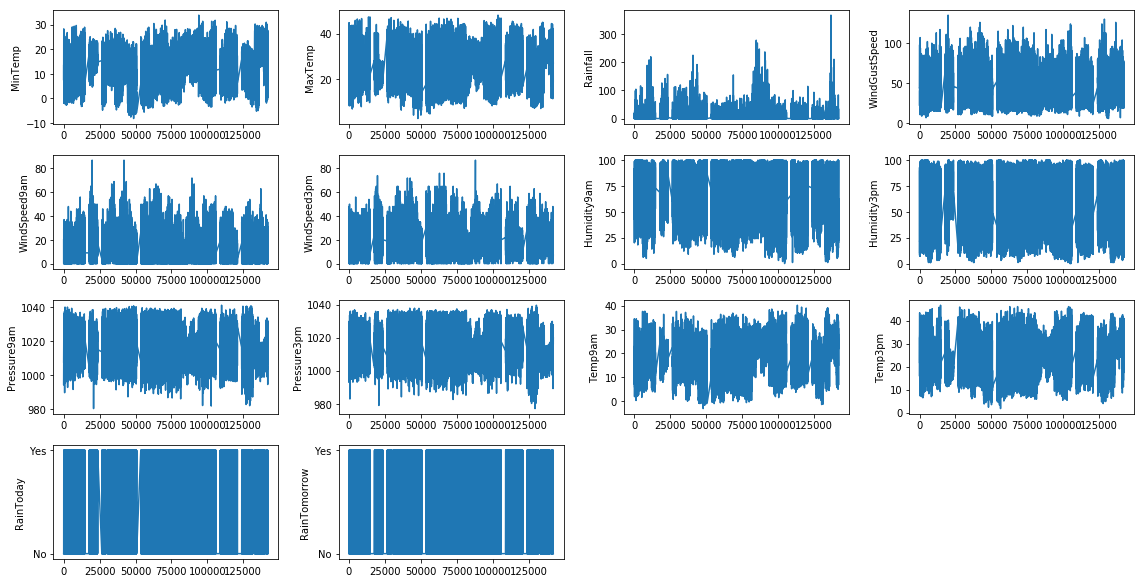

In [211]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(14):
    plt.subplot(6, 4, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()

### Preliminary Observation
Almost all features have densely distributed values within the range of their data. Rain Tomorrow has around 100,000 positive result. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x284D6370>,
      dtype=object)

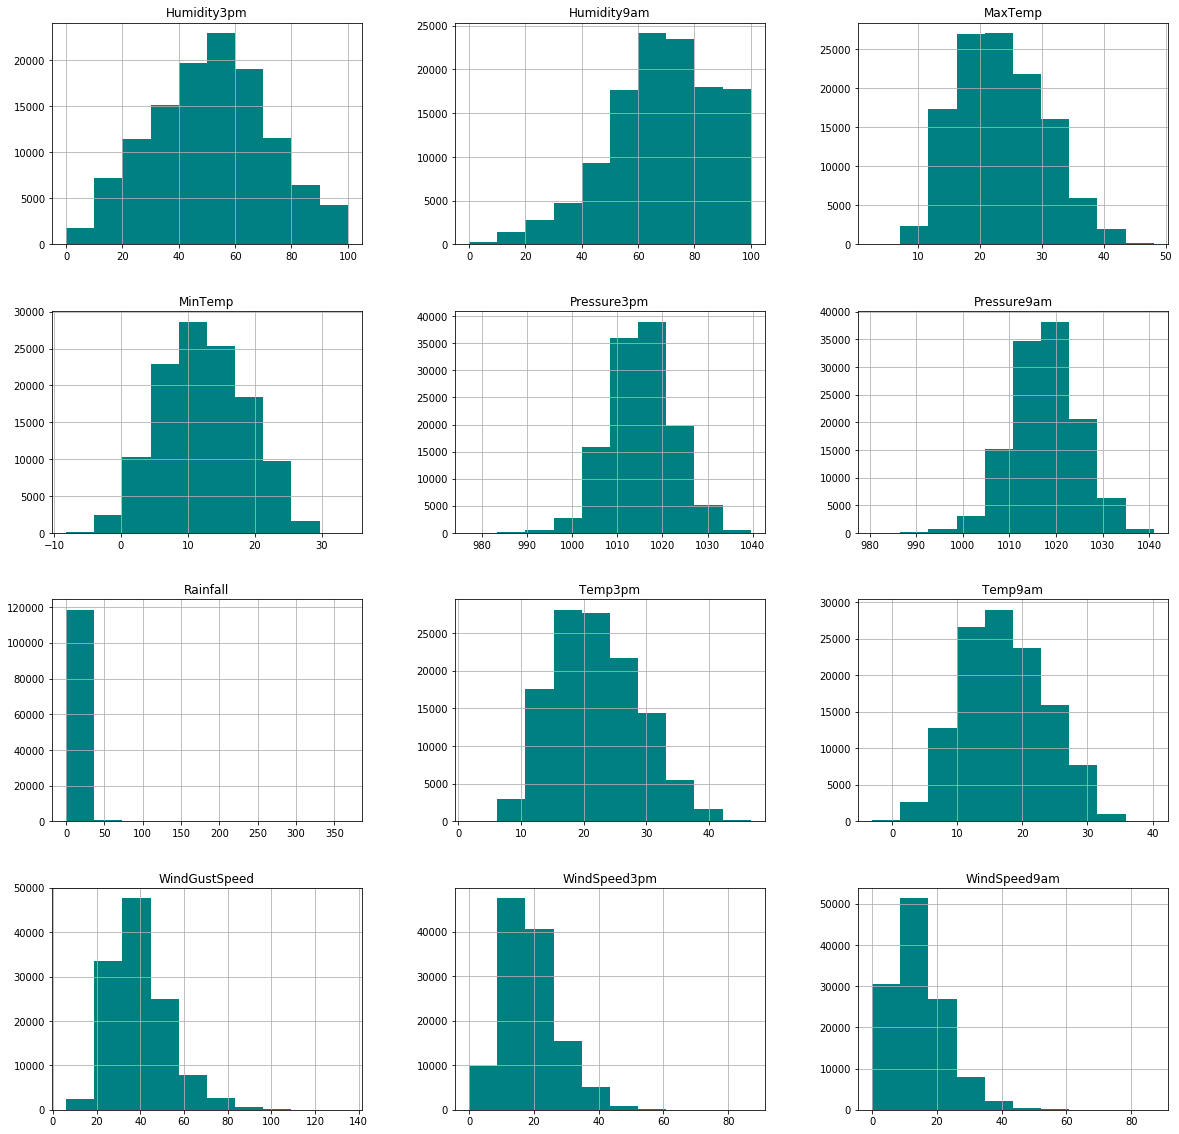

In [212]:
df.hist(figsize=(20,20), color='teal')

### Preliminary Observation

1. Humidity at 3pm is between range of 0 to 100 and has value of 50 for maximum entries.
2. Humidity at 9pm is between range of 0 to 100 and has value of 70 for maximum entries. 
3. Maximum temperature recorded ranges from 5 to 45 degrees, 20 degrees is the most recorded highest temperature.
4. Minimum temperature recorded ranges from 0 to 30 degrees, 10 degrees is the most recorded highest temperature.
5. Pressure at 3 pm is between range of 1000 to 1030 and maximum is recorded from 1010 to 1020.
6. Pressure at 9 am is between range of 1000 to 1040 and maximum is recorded from 1010 to 1020.
7. More than 80000 entries suggest that it rained on that day.
8. Around 80000 entries suggest that it will rain on the next day.
9. Rainfall mostly recorded has been between 0-5
10. Wind gust speed recorded is between range of 0 to 80 and maximum is recorded at 30.

Using z-score to detect and remove outliers from the dataset

In [213]:
from scipy import stats
z_score = np.abs(stats.zscore(df._get_numeric_data()))
print(z_score)
df= df[(z_score < 3).all(axis=1)]
print(df.shape)

[[0.15915995 0.08387    0.20329958 ... 1.16149309 0.04431849 0.02614842]
 [0.78312355 0.2310207  0.274179   ... 1.06176919 0.00219751 0.3397351 ]
 [0.08063632 0.31689998 0.274179   ... 0.93355274 0.59140008 0.17874635]
 ...
 [1.3799031  0.25964712 0.274179   ... 0.54805952 0.97463834 0.36900578]
 [1.09721805 0.48865854 0.274179   ... 0.22039527 0.72655305 0.60317123]
 [0.72030465 0.50297175 0.274179   ... 0.17765645 0.32341444 0.58853589]]
(114424, 14)


In [214]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [215]:
binary_dict = {'Yes': 1, 'No':-1}

df['RainToday'] = df['RainToday'].apply(lambda x: binary_dict[x])
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: binary_dict[x])

In [216]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1,-1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1,-1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1,-1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1,-1
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1,-1


In [217]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000,114424.000000
mean,12.274083,23.472671,1.442986,39.116523,13.875891,18.654172,68.293514,50.552061,1017.986688,1015.552021,17.110494,21.984197,-0.591012,-0.589457
std,6.364649,6.923681,3.825441,12.168098,8.157745,8.131853,18.757088,20.332077,6.813314,6.766111,6.421352,6.764312,0.806666,0.807803
min,-6.700000,2.600000,0.000000,6.000000,0.000000,0.000000,11.000000,0.000000,996.400000,994.200000,-1.700000,2.300000,-1.000000,-1.000000
25%,7.600000,18.100000,0.000000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.300000,1010.800000,12.300000,16.800000,-1.000000,-1.000000
50%,12.000000,23.000000,0.000000,37.000000,13.000000,19.000000,69.000000,51.000000,1017.900000,1015.400000,16.800000,21.400000,-1.000000,-1.000000
75%,16.900000,28.500000,0.600000,46.000000,19.000000,24.000000,82.000000,64.000000,1022.600000,1020.200000,21.700000,26.700000,-1.000000,-1.000000
max,31.400000,44.400000,27.600000,80.000000,39.000000,44.000000,100.000000,100.000000,1038.900000,1036.300000,36.500000,42.400000,1.000000,1.000000


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.733937,0.070687,0.210579,0.214969,0.187464,-0.258969,0.017132,-0.473762,-0.482636,0.905312,0.709306,0.044086,0.079544
MaxTemp,0.733937,1.000000,-0.150979,0.114038,0.047917,0.061142,-0.524876,-0.498559,-0.364802,-0.457452,0.881628,0.985276,-0.229646,-0.156057
Rainfall,0.070687,-0.150979,1.000000,0.131583,0.075838,0.058881,0.277130,0.298130,-0.172766,-0.107073,-0.047370,-0.156419,0.705883,0.265711
WindGustSpeed,0.210579,0.114038,0.131583,1.000000,0.571860,0.673098,-0.237911,-0.056656,-0.430819,-0.386342,0.186551,0.077661,0.136316,0.208967
WindSpeed9am,0.214969,0.047917,0.075838,0.571860,1.000000,0.477310,-0.284152,-0.043309,-0.204660,-0.155535,0.160799,0.034038,0.088139,0.069729
WindSpeed3pm,0.187464,0.061142,0.058881,0.673098,0.477310,1.000000,-0.136955,0.027977,-0.279884,-0.240823,0.179102,0.037363,0.073250,0.069301
Humidity9am,-0.258969,-0.524876,0.277130,-0.237911,-0.284152,-0.136955,1.000000,0.665787,0.157876,0.205016,-0.488699,-0.517650,0.340404,0.248000
Humidity3pm,0.017132,-0.498559,0.298130,-0.056656,-0.043309,0.027977,0.665787,1.000000,-0.012030,0.068408,-0.201222,-0.547669,0.359706,0.439215
Pressure9am,-0.473762,-0.364802,-0.172766,-0.430819,-0.204660,-0.279884,0.157876,-0.012030,1.000000,0.961275,-0.449880,-0.325065,-0.164164,-0.223937
Pressure3pm,-0.482636,-0.457452,-0.107073,-0.386342,-0.155535,-0.240823,0.205016,0.068408,0.961275,1.000000,-0.494994,-0.426787,-0.082434,-0.206423


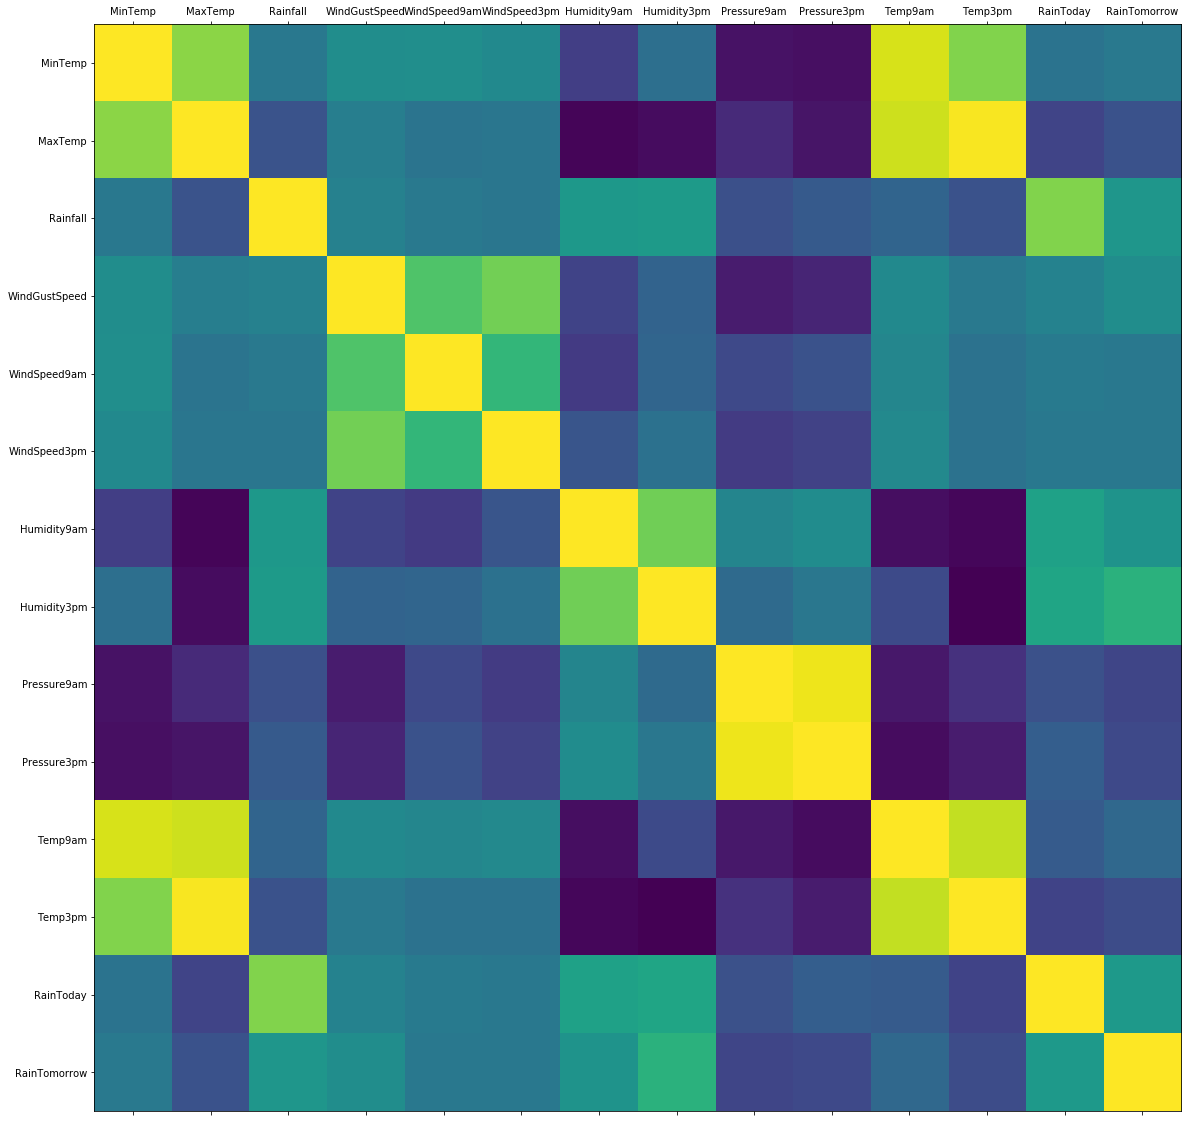

In [218]:
size=20
correlation = df.corr()
correlation.style.background_gradient().set_precision(2)
correlation.style.format("{:.2%}")

fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(correlation,interpolation="nearest")

plt.xticks(range(len(correlation.columns)), correlation.columns);
plt.yticks(range(len(correlation.columns)), correlation.columns);

correlation

### Preliminary Observation
There is similarity between Humidity3pm and Rain Today with our target __Rain Tomorrow__

In [219]:
""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

### Confusion Matrix

In [220]:
# Confustion matrix 

def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

### Evaluation Metrics:

In [221]:

def accuracy(mat):
    acc = (mat.iloc[0,0] + mat.iloc[1,1]) / (mat.iloc[0,0] + mat.iloc[0,1] + mat.iloc[1,1] + mat.iloc[1,0])
    print('Accuracy: ', round(acc * 100, 2), '%')

def recall(mat):
    rec = mat.iloc[1,1] / (mat.iloc[1,1] + mat.iloc[0,1])
    print('Recall: ', round(rec * 100, 2), '%')

def precision(mat):
    
    if mat.iloc[1,1] + mat.iloc[1,0] == 0 :
        print('Precision: is zero')        
    else:
        pre = mat.iloc[1,1] / (mat.iloc[1,1] + mat.iloc[1,0])
        print('Precision: ', round(pre * 100, 2), '%')
 

# III. Method

### Pocket Algorithm:
The pocket algorithm keeps the best solution in its pocket. More the number of iterations, better the accuracy. But the algorithm wont converge, if data isn't linearly separable. We train the w by adjusting learning rate and pass the test data to predict outcome by obtaining dot product of data and w.

### QDA:
Quadratic Discrimant function uses sigma, mu, and prior to calculate two discriminants. The difference in these discriminants is the prediction of our model. QDA is used to calculate the likelihood. QDA uses covariance matrix for each class to calculate the discriminant function. The decision boundary is placed where the discriminant functions meet.

### LDA:
Linear Discrimant function also uses sigma, mu and prior to calculate two discimants. Maintaining a covariance matrix is expensive and overfitting has higher chances in QDA, LDA is used instead to solve this problem

### Implementation of Codes:
After preprocesing the data, we divide the data in negative and positive sections based on its target values. <br>
Both these sets are then partitioned into training and test sets in 80:20 division. <br>
The BaseModel has abstract train and use methods, for other methods to implement.<br>
The Classifier method implements BaseModel. It initializes mean and std. Normalizes data based on mean and std.<br>
Check matrix ensures the matrix is in valid shape and add_ones adds a 1 bias to its input matrix. Classifier method consists of mostly utility functions for use.<br>
    In pocket algorithm, alpha, w, w_pocket are initialized. We normalize and add ones in train function of pocket algorithm. Then we iterate through instances to calculate w using alpha and x. The best w (w_pocket) is stored by comparing each current w with the best w so far. The better one is returned at the end of iterations. <br>
    Use method, utilizes this w and calculates result for Xtest data and gives.<br>
    In QDA, we initialize sigmas, priors and mu. The train method accepts negative and postive train instances of data. based on their length and values, we compute sigma1, sigma2, prior1, prior2, mu1,mu2 using covariance.<br>
    The use method, normalizes the data and uses QDA function to calculate discriminants 1 and 2. <br>    
    In LDA, we initialize sigmas, priors and mu. The train method accepts negative and postive train instances of data. Based on their length and values, we compute sigma1, sigma2, prior1, prior2, mu1,mu2 using covariance.<br>
    The use method, normalizes the data and uses LDA function to calculate discriminants 1 and 2. The difference in both is our prediction value. <br>
    In logistic regression we initialize mean, std and w. the train accepts positive and negative instances of train data. These go through normalization and are modified in softmax function to obtain w based on Ttrain data.

### A. Super Classs Definition

In [222]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm


In [223]:
class PocketAlgorithm(Classifier):
    
    def __init__(self, alpha):
        self.alpha = alpha
        self.w = []
        self.w_pocket = []
        
    # return 1 if w is better -1 if wp is better
    def compare(self,X, T, w, wp):
        y = np.sign(X @ w)
        yp = np.sign(X @ wp)

        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):
        X = self.normalize(X)
        X1 = self.add_ones(X)        
        self.w=np.zeros(X1.shape[1])
        self.w_pocket=copy(self.w)

        N = 1000
        
        for i in range(N):
            converged = True
            for k in np.random.permutation(N): 
                y = self.w @ X1[k]
                if np.sign(y) != np.sign(T[k]):
                    self.w += self.alpha * T[k] * X1[k]
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(X1[k], T, self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]
            
            if converged:
                print("converged at ", i)
                break
        print('ended training at ', i)
        
    def use(self, X):
        X = self.normalize(X)
        X = self.add_ones(X)
        Y = X @self.w_pocket

        plt.plot(Y, 'xb')
        return Y

### C. QDA

In [224]:

class QDA_class(Classifier): 
   
    def __init__(self):
#         Classifier.__init__(self)
        self.prior1=None
        self.prior2=None
        self.Sigma1=None
        self.Sigma2=None
        self.mean=None
        self.mu1=None
        self.mu2=None
        self.stds=None
        
    def train(self,Xneg,Xpos):
        N1=Xneg.shape[0]
        N2=Xpos.shape[0]
        N=N1+N2
        Xtrain = np.vstack((Xneg, Xpos))
        self.means, self.stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
        Xs=self.normalize(Xtrain)
        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)
        self.Sigma1 = np.cov(Xs[:N1].T)
        self.Sigma2 = np.cov(Xs[N1:].T)
        self.prior1 = N1 / N
        self.prior2 = N2 / N

    def QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
                - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
                + np.log(prior)

    # apply the learned model to data X
    def use(self, Xt):
        Xtest1=self.normalize(Xt)
        d1 = self.QDA(Xtest1, self.mu1, self.Sigma1, self.prior1)
        d2 = self.QDA(Xtest1, self.mu2, self.Sigma2, self.prior2)
        return d1, d2

    def plot_generative_dist(self, d1, d2, xs, ys):
        # Plot generative distributions  p(x | Class=k)  starting with discriminant functions

        fig = plt.figure(figsize=(8,8))
        ax = fig.gca(projection='3d')

        prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior1))
        prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior2))
        ax.plot_surface(xs, ys, prob1, alpha=0.2)
        ax.plot_surface(xs, ys, prob2, alpha=0.4)


        plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### D. LDA

In [225]:

class LDA_class(Classifier): 
   
    def __init__(self):
#         Classifier.__init__(self)
        self.prior1=None
        self.prior2=None
        self.Sigma=None
        self.mean=None
        self.mu1=None
        self.mu2=None
        self.stds=None
        
    def train(self,Xneg,Xpos):
        N1=Xneg.shape[0]
        N2=Xpos.shape[0]
        N=N1+N2
        Xtrain = np.vstack((Xneg, Xpos))
        self.means, self.stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
        Xs=self.normalize(Xtrain)
        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)
        self.Sigma = np.cov(Xs.T)
        self.prior1 = N1 / N
        self.prior2 = N2 / N

    def LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                    - 0.5 * np.dot(mu, sigma_inv) * mu \
                    + np.log(prior), axis=1)

    # apply the learned model to data X
    def use(self, Xt):
        Xtest1=self.normalize(Xt)
        d1 = self.LDA(Xtest1, self.mu1, self.Sigma, self.prior1)
        d2 = self.LDA(Xtest1, self.mu2, self.Sigma, self.prior2)
        return d1, d2

    def plot_discrimant_func(self, xs, ys, d1, d2):
        
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca(projection='3d')
        ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
        ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
        plt.title("LDA Discriminant Functions")
    
    
    def plot_generative_dist(self, d1, d2, xs, ys):
        # Plot generative distributions  p(x | Class=k)  starting with discriminant functions

        fig = plt.figure(figsize=(8,8))
        ax = fig.gca(projection='3d')

        prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior1))
        prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(self.prior2))
        ax.plot_surface(xs, ys, prob1, alpha=0.2)
        ax.plot_surface(xs, ys, prob2, alpha=0.4)


        plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

### E. Logistic Regression

In [226]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy as copy 


class Logistic_class(Classifier): 
   
    def __init__(self):
        Classifier.__init__(self)
        self.mean=None
        self.stds=None
        self.w=None
        
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
    
    def g(self,X, w):
        return self.softmax(X @ w)          
        
    def train(self,Xn,Xp):
        K=2
        D=Xn.shape[1]
        N1=Xn.shape[0]
        Xtrain = np.vstack((Xn, Xp))
        self.means, self.stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
        Xs = (Xtrain - self.means) / self.stds
        #Xs=self.normalize(Xtrain)
        N=Xtrain.shape[0]
        Ttrain = np.zeros((N, 2))
        Ttrain[:N1, 0] = 1
        Ttrain[N1:, 1] = 1
        self.w = np.random.rand(D+1, K)
        niter = 1000
        alpha = 0.001
        X1=self.add_ones(Xs)
        for step in range(niter):
            # TODO: add training code here! 
            ys = self.g(X1, self.w)
            self.w += alpha * X1.T @ (Ttrain - ys)
    
    
    # apply the learned model to data X
    def use(self, Xuse):
        Xtests = (Xuse - self.means) / self.stds
        #Xtests=self.normalize(Xuse)      
        X1t = self.add_ones(Xtests)
        Y = self.g(X1t, self.w)
        return Y

# IV. Experiments


Precision is the accuracy of positive predictions. TP/TP+FP <br>
Recall is the measure of how the model's prediction covers the positive class. TP/TP+FN <br>
Specificity gives the True Negative rate. TN/TN+FP <br>

Pocket Algorithm: Th accuracy is around 68.57% of this model. To avoid heavy computations, the alpha rate was used as 0.1. <br>

LDA: LDA has around 60.62 % accuracy. This value changes as the train and split function randomly takes the train data set and test data set. Precision is 33%.

QDA: QDA has around 60.62 % accuracy. This value changes as the train and split function randomly takes the train data set and test data set. Recall is 19 %.

Comparison: Among all the algorithms, Pocket algorithm gives better results for this dataset.

In [227]:
X = np.asarray(df.drop(columns=['RainTomorrow'],axis=1))
T=np.asarray(df['RainTomorrow'])
Xs,Ts = partition(pd.DataFrame(X),pd.DataFrame(T))
Xtrain, Xtest = [xx.as_matrix() for xx in Xs]
Ttrain, Ttest = [tt.as_matrix() for tt in Ts]

c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


ended training at  999


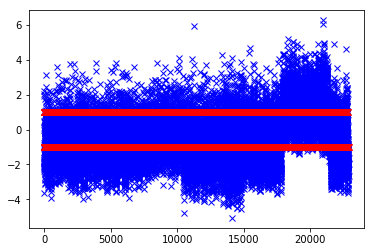

In [228]:
pa = PocketAlgorithm(0.1)
pa.train(Xtrain, Ttrain)
Y = pa.use(Xtest)
plt.plot(Ttest, 'xr')

In [229]:
ysign=np.sign(Y).reshape(Y.shape[0],1)
cm = confusion_matrix(ysign, Ttest)
cm

,-1,1
-1,12915,1613
1,5580,2777


In [230]:
accuracy(cm)
recall(cm)
precision(cm)

Accuracy:  68.57 %
Recall:  63.26 %
Precision:  33.23 %


### QDA Experiment

In [231]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1,-1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1,-1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1,-1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1,-1
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1,-1


In [232]:
# 1. Separate out positive and negative data
# qda_df = df.drop(columns=['WindGustDir','WindGustSpeed','WindDir3pm','WindDir9am'],axis=1)
qda_df = df
pos_df = qda_df.loc[qda_df['RainTomorrow'] == 1]
pos_T = pos_df['RainTomorrow']
pos_df = pos_df.drop(columns=['RainTomorrow'],axis=1)

neg_df = qda_df.loc[qda_df['RainTomorrow'] == -1]
neg_T = neg_df['RainTomorrow']
neg_df = neg_df.drop(columns=['RainTomorrow'],axis=1)

In [233]:
#2 partition their test and train (2 * 4)
Xpos,Tpos = partition(pd.DataFrame(pos_df), pd.DataFrame(pos_T))
Xneg,Tneg = partition(pd.DataFrame(neg_df), pd.DataFrame(neg_T))

# make matrix

X_pos_train, X_pos_test = [xx.as_matrix() for xx in Xpos]
T_pos_train, T_pos_test = [tt.as_matrix() for tt in Tpos]
X_neg_train, X_neg_test = [xx.as_matrix() for xx in Xneg]
T_neg_train, T_neg_test = [tt.as_matrix() for tt in Tneg]

Xtest = np.vstack((X_neg_test, X_pos_test))

c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
c:\users\mayuri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


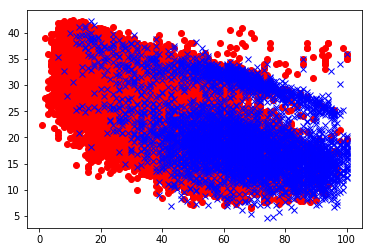

In [234]:
plt.plot(X_neg_test[:, 7], X_neg_test[:, 11], 'or')
plt.plot(X_pos_test[:, 7], X_pos_test[:, 11], 'xb')

In [235]:
qda = QDA_class()
qda.train(X_neg_train, X_pos_train)
d1, d2 = qda.use(Xtest)

In [236]:
xxx = Xtest[:21025]
Humidity3pm = (xxx[:,7].reshape(145,145))

RainToday = (xxx[:,11].reshape(145,145))
RainToday.shape

(145, 145)

Text(0.5, 0.92, 'QDA Discriminant Functions')

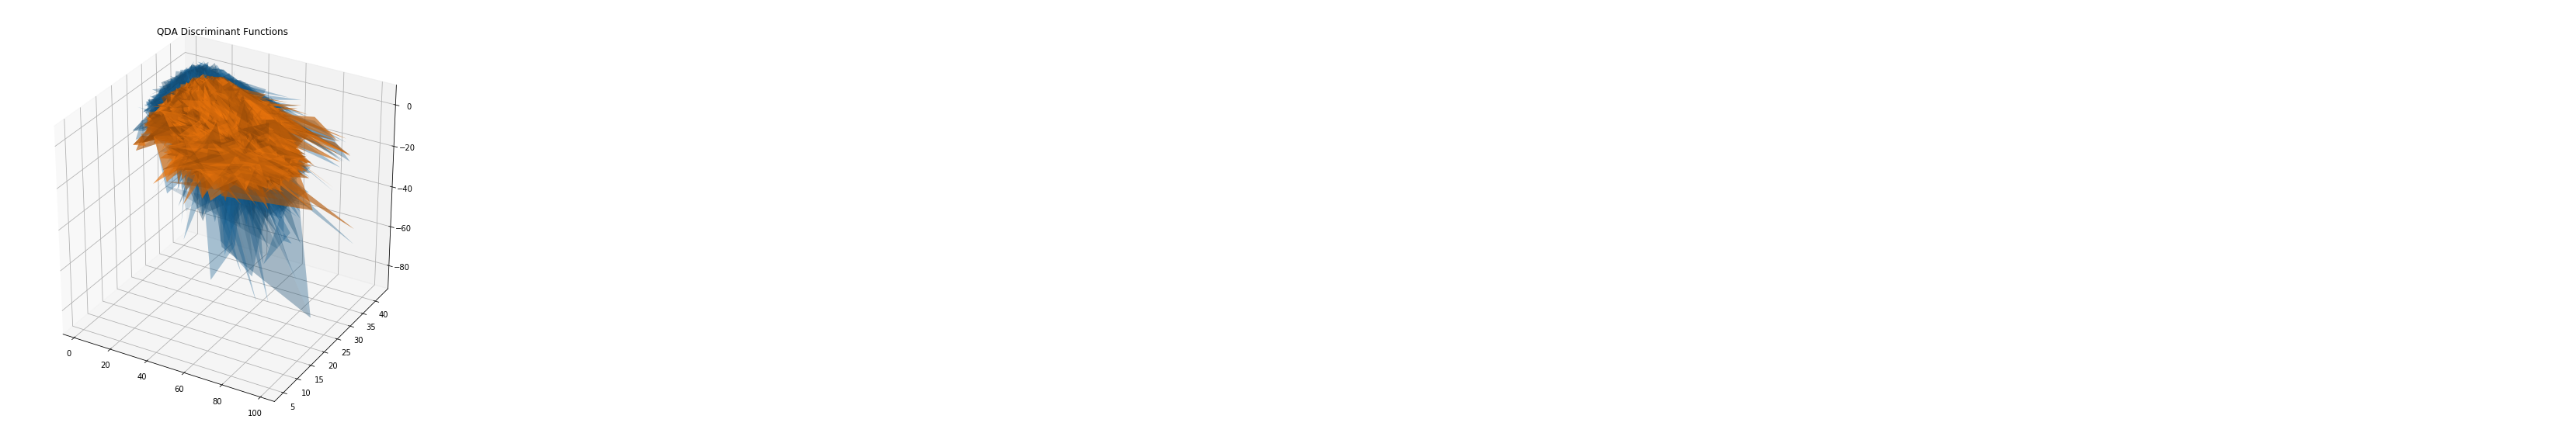

In [237]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([2, 2, 2, 2]))

ax.plot_surface(Humidity3pm, RainToday, d1[:21025].reshape(Humidity3pm.shape), alpha=0.2)
ax.plot_surface(Humidity3pm, RainToday, d2[:21025].reshape(Humidity3pm.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

<Figure size 432x288 with 0 Axes>

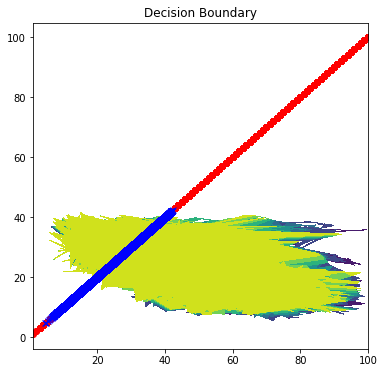

In [238]:
xxx = Xtest[:22500]
Humidity3pm = (xxx[:,7].reshape(150,150))

RainToday = (xxx[:,11].reshape(150,150))
RainToday.shape

ds = d1-d2
plt.clf()
plt.figure(figsize=(6,6))
plt.contourf(Humidity3pm, RainToday, (ds[:22500] > 0).reshape(Humidity3pm.shape))
plt.title("Decision Boundary")
plt.plot(Humidity3pm, Humidity3pm, 'or')
plt.plot(RainToday, RainToday, 'xb')
plt.show()

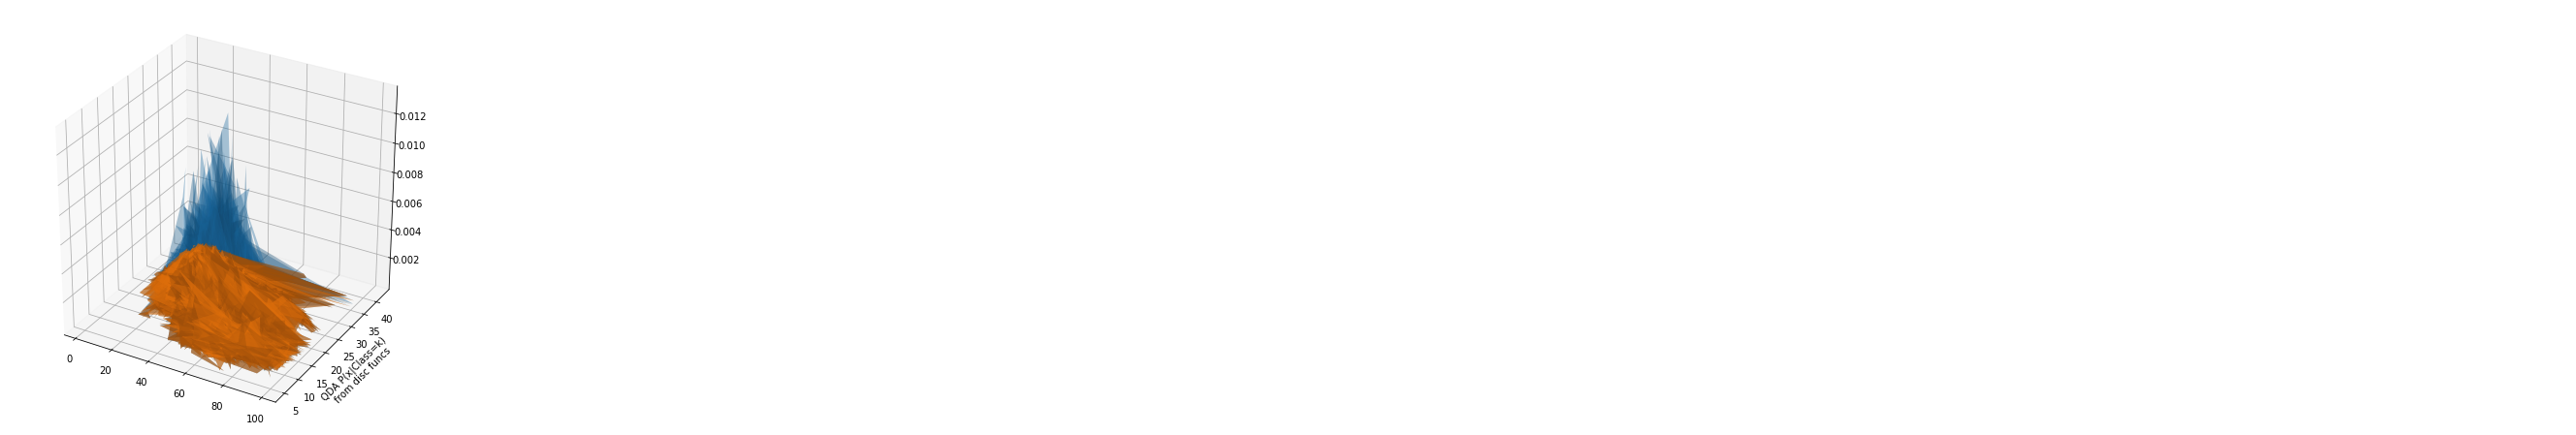

In [239]:
qda.plot_generative_dist(d1[:22500], d2[:22500], Humidity3pm, RainToday)

In [240]:
ysignd1=np.sign(d2).reshape(d2.shape[0],1)
cm = confusion_matrix(ysignd1, Ttest)
cm

,-1,1
-1,12406,2924
1,6089,1466


In [241]:
accuracy(cm)
recall(cm)
precision(cm)

Accuracy:  60.62 %
Recall:  33.39 %
Precision:  19.4 %


### LDA Experiment

In [242]:
lda = LDA_class()
lda.train(X_neg_train, X_pos_train)
lda_d1, lda_d2 = lda.use(Xtest)

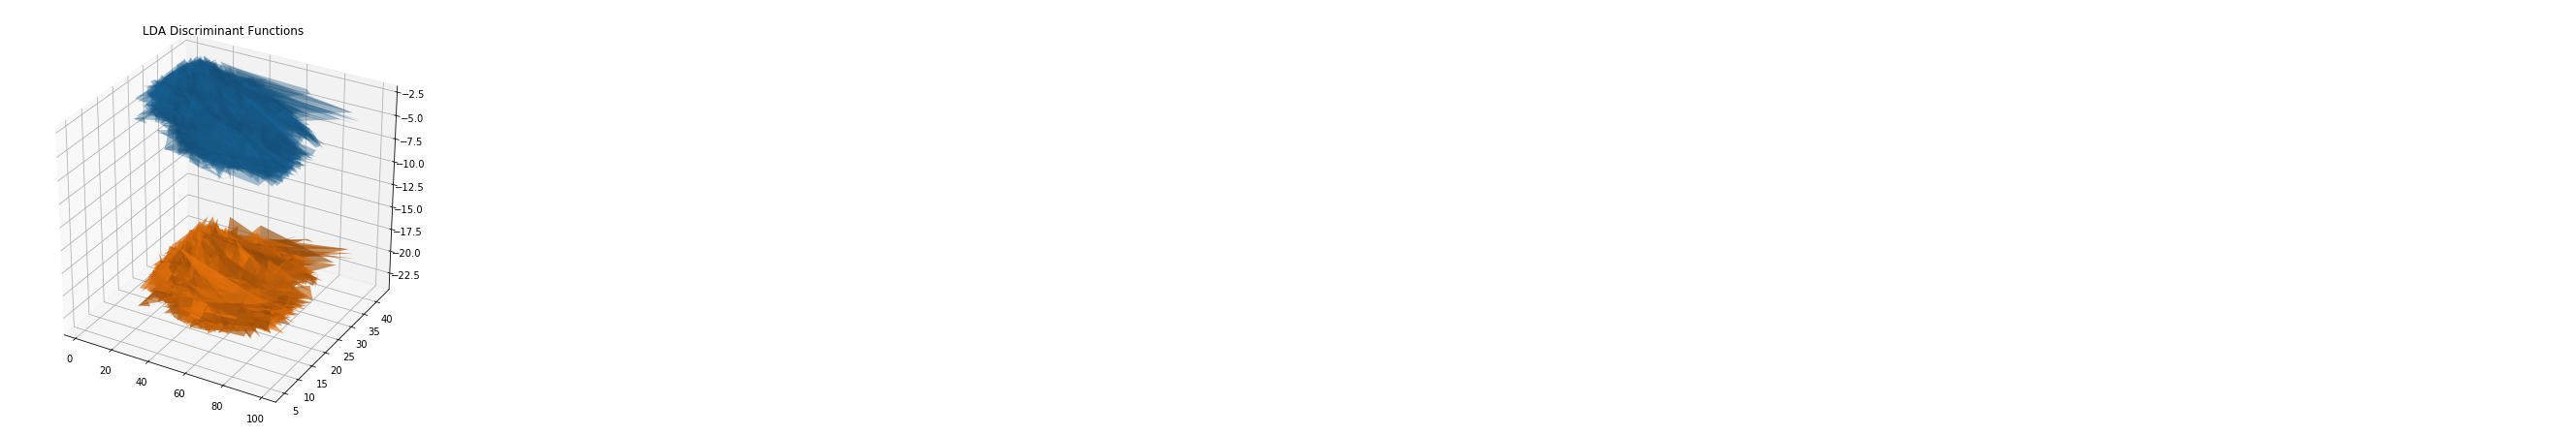

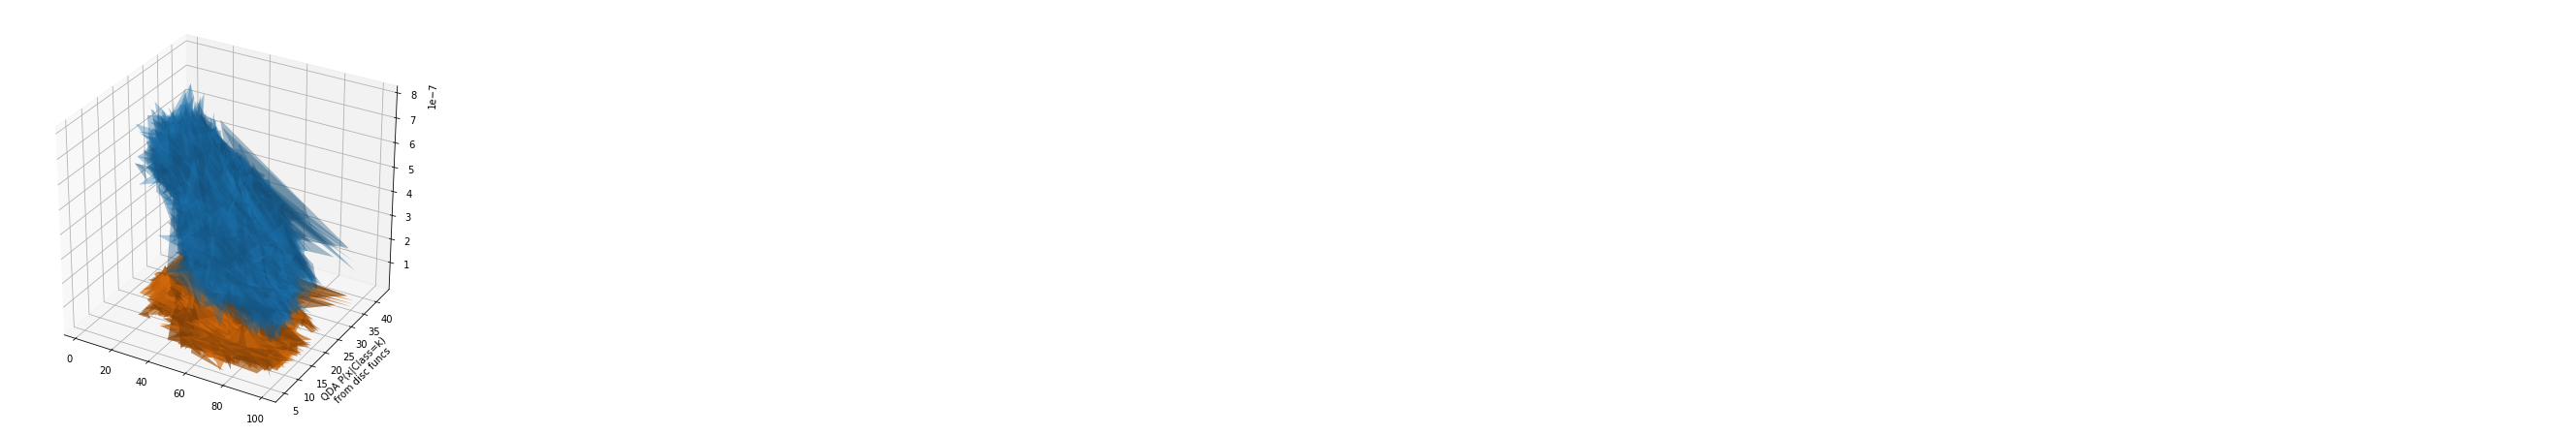

In [243]:
ds = lda_d1 - lda_d2
lda.plot_discrimant_func(Humidity3pm, RainToday, lda_d1[:22500], lda_d2[:22500])
lda.plot_generative_dist(lda_d1[:22500], lda_d2[:22500], Humidity3pm, RainToday)

In [247]:
ysignd1=np.sign(d2).reshape(d2.shape[0],1)
cm1 = confusion_matrix(ysignd1, Ttest)
cm1

,-1,1
-1,12406,2924
1,6089,1466


In [248]:
accuracy(cm1)
recall(cm1)
precision(cm1)

Accuracy:  60.62 %
Recall:  33.39 %
Precision:  19.4 %


### Logistic Regression Experiment

In [244]:
logic=Logistic_class()
logic.train(X_neg_train, X_pos_train)
Yt=logic.use(Xtest)


In [245]:
Yt

array([[1.00000000e+00, 5.06173829e-12],
       [1.00000000e+00, 1.65127180e-57],
       [1.00000000e+00, 2.12938453e-32],
       ...,
       [3.82661991e-36, 1.00000000e+00],
       [9.99999998e-01, 1.64162156e-09],
       [8.72463052e-12, 1.00000000e+00]])

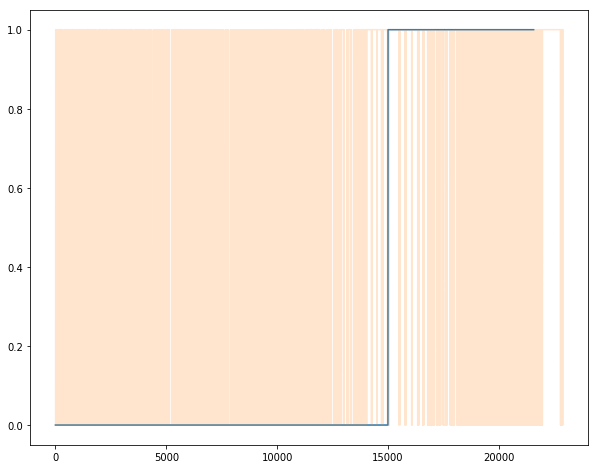

In [246]:
T_test = np.zeros((21574, 2))
T_test[:15000, 0] = 1
T_test[15000:, 1] = 1

Yl = np.argmax(Yt, 1)
Tl = np.argmax(T_test, 1)
# Y1train= np.argmax(Ytx, 1)
# Tltrain= np.argmax(Ttrain, 1)
fig = plt.figure(figsize=(10,8))
plt.plot(Tl)
plt.plot(Yl,alpha=0.2)


# Challenges
I faced challenges in looking for the appropriate dataset for binary classification. Also, the preprocessing of dataset was a bit daunting, as it involved detecting and removing unnecessary features and noise from data.

# Conclusions

We have achieved binary classification succesfully in predicting weather data. For this dataset, pocket algorithm gives us best accuracy. Pocket algorithm keeps best solution in its pocket. QDA, LDA and Logistic Regression make use of discrimnants and alpha learning rates to achieve prediction values.

# References

1. Young, Joe. “Rain in Australia.” RSNA Pneumonia Detection Challenge | Kaggle, Joe Young, 3 Dec. 2018, www.kaggle.com/jsphyg/weather-dataset-rattle-package.
2. “Standard Score (Cont...).” Spearman's Rank Order Correlation Using SPSS Statistics - A How-To Statistical Guide by Laerd Statistics, statistics.laerd.com/statistical-guides/standard-score-2.php.
3. Goodfellow, I., Bengio, Y., & Courville, A. (2017). Deep learning. Cambridge, MA: MIT Press. Retrieved from http://www.deeplearningbook.org
4. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: OReilly Media.

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)